['__globals__', '__header__', '__version__', 'cap', 'col_cell_label', 'curr', 'row_diag_number', 'time', 'vcell']


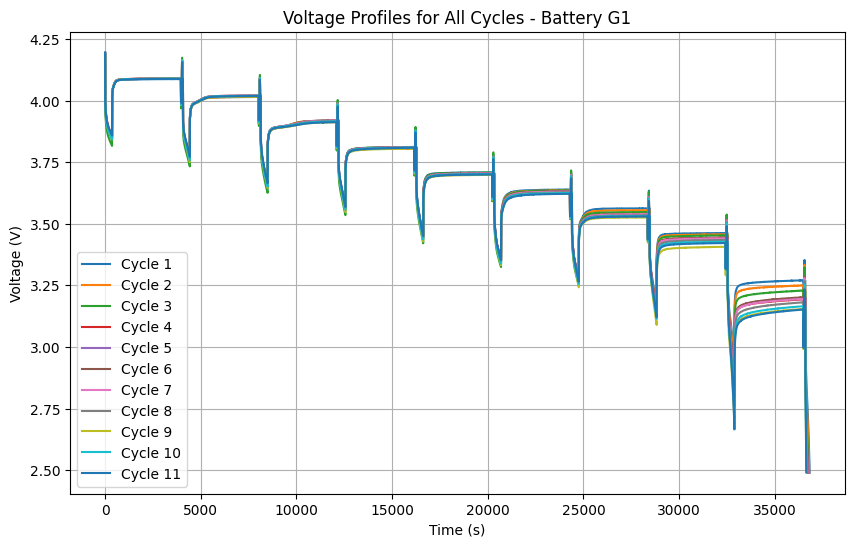

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio  

# Load the data
mat = sio.loadmat('HPPC_test.mat')
print(sorted(mat.keys()))

# Select the data for the specific battery cell
battery_label = 'G1'

col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]
vcell = mat['vcell'][:, col_index]
current = mat['curr'][:, col_index]
cap = mat['cap'][:, col_index]

# Voltage plot
plt.figure(figsize=(10, 6))
for i, vcell_cycle in enumerate(vcell):
    if vcell_cycle.size > 1 and not np.isnan(vcell_cycle).all():  # Skip empty or NaN rows
        vcell = vcell_cycle[~np.isnan(vcell_cycle)].reshape(-1)  # Remove NaN and flatten
        plt.plot(vcell, label=f"Cycle {i+1}")

plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title(f"Voltage Profiles for All Cycles - Battery {battery_label}")
plt.legend()
plt.grid(True)
plt.show()

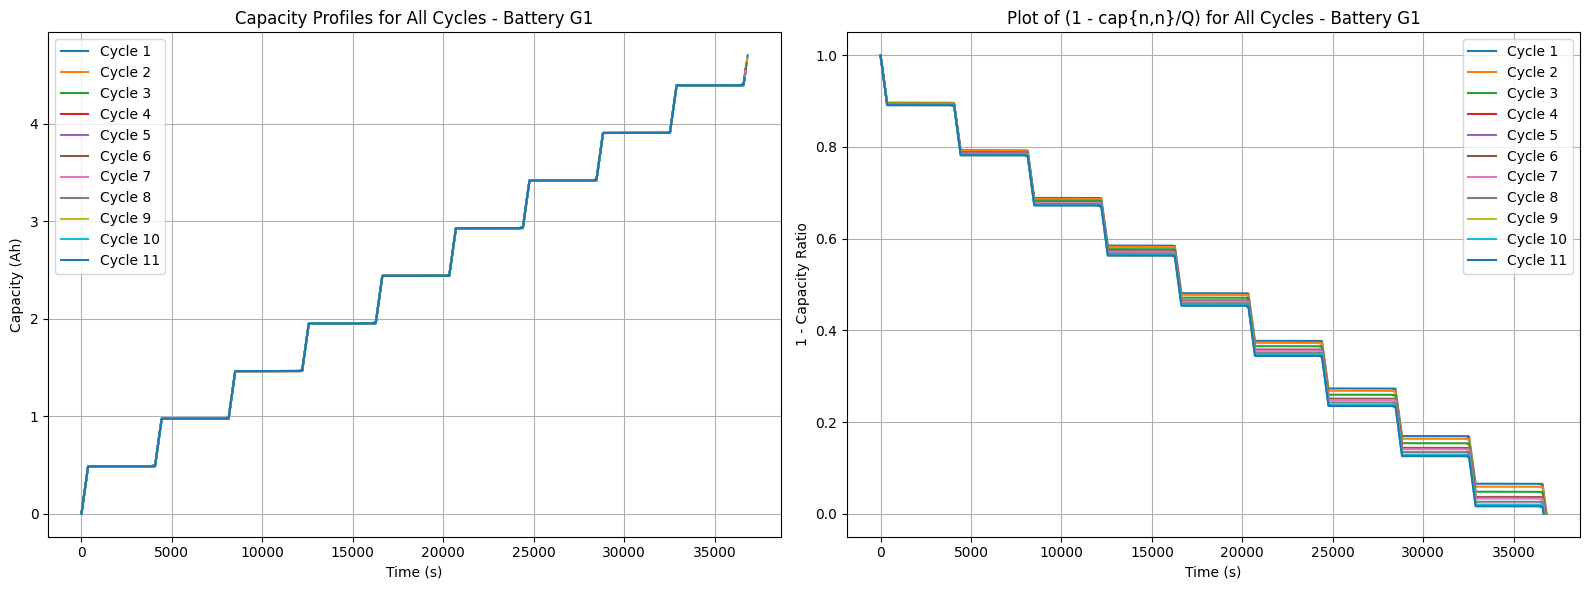

[Q] Last capacity value of each cycle:
Cycle 1: 4.7020180161794025
Cycle 2: 4.669648041261567
Cycle 3: 4.615839233265983
Cycle 4: 4.56053246974945
Cycle 5: 4.557819279564751
Cycle 6: 4.557838889426655
Cycle 7: 4.544314201143052
Cycle 8: 4.51208200706376
Cycle 9: 4.471657842066553
Cycle 10: 4.483806274334589
Cycle 11: 4.466178816954295


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio  

# Load the data
mat = sio.loadmat('HPPC_test.mat')

# Select the data for the specific battery cell
battery_label = 'G1'

col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]
vcell = mat['vcell'][:, col_index]
current = mat['curr'][:, col_index]
cap = mat['cap'][:, col_index]

# Initialize Q to store the last capacity of each cycle
Q = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Capacity profiles for all cycles
for i, capacity_cycle in enumerate(cap):
    if capacity_cycle.size > 1 and not np.isnan(capacity_cycle).all():  # Skip empty or NaN rows
        cap_cycle = capacity_cycle[~np.isnan(capacity_cycle)].reshape(-1)  # Remove NaN and flatten
        Q.append(cap_cycle[-1])  # Append the last value of the capacity cycle
        ax1.plot(cap_cycle, label=f"Cycle {i+1}")

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Capacity (Ah)")
ax1.set_title(f"Capacity Profiles for All Cycles - Battery {battery_label}")
ax1.legend()
ax1.grid(True)

# Plot 2: (1 - cap{n,n}/Q) for each cycle
for i, capacity_cycle in enumerate(cap):
    if capacity_cycle.size > 1 and not np.isnan(capacity_cycle).all():  # Skip empty or NaN rows
        cap_cycle = capacity_cycle[~np.isnan(capacity_cycle)].reshape(-1)  # Remove NaN and flatten
        ratio = 1 - (cap_cycle / Q[i])  # Compute 1 - cap{n,n}/Q for the current cycle
        ax2.plot(ratio, label=f"Cycle {i+1}")

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("1 - Capacity Ratio")
ax2.set_title(f"Plot of (1 - cap{{n,n}}/Q) for All Cycles - Battery {battery_label}")
ax2.legend()
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Print Q with associated cycling test
print("[Q] Last capacity value of each cycle:")
for cycle_num, q_value in enumerate(Q, start=1):
    print(f"Cycle {cycle_num}: {q_value}")


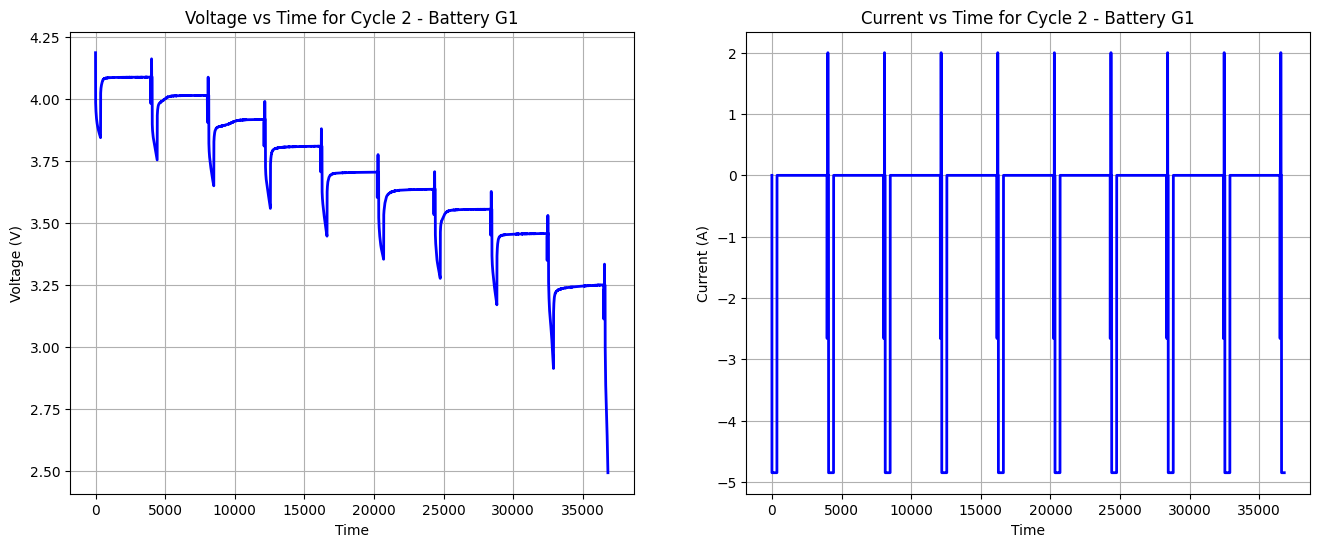

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

mat = sio.loadmat('HPPC_test.mat')

# Define the battery label and cycle number
battery_label = 'G1'
cycle_number = 1

# Select the data for the specific battery cell
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]

# Extract data for the specific cycle
vcell_cycle = mat['vcell'][cycle_number][col_index]
current_cycle = mat['curr'][cycle_number][col_index]

# Ensure data is 1-dimensional
vcell_cycle = np.array(vcell_cycle).flatten()
current_cycle = np.array(current_cycle).flatten()

# Remove NaN values
valid_indices = ~np.isnan(vcell_cycle) & ~np.isnan(current_cycle)
vcell_cycle = vcell_cycle[valid_indices]
current_cycle = current_cycle[valid_indices]

# Create time vector based on valid data points
time_vector = np.arange(len(vcell_cycle)) # its acctully sample nums

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(time_vector, vcell_cycle, 'b-', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage (V)')
ax1.set_title(f'Voltage vs Time for Cycle {cycle_number + 1} - Battery {battery_label}')
ax1.grid(True)

ax2.plot(time_vector, current_cycle, 'b-', linewidth=2)
ax2.set_xlabel('Time')
ax2.set_ylabel('Current (A)')
ax2.set_title(f'Current vs Time for Cycle {cycle_number + 1} - Battery {battery_label}')
ax2.grid(True)

plt.show()

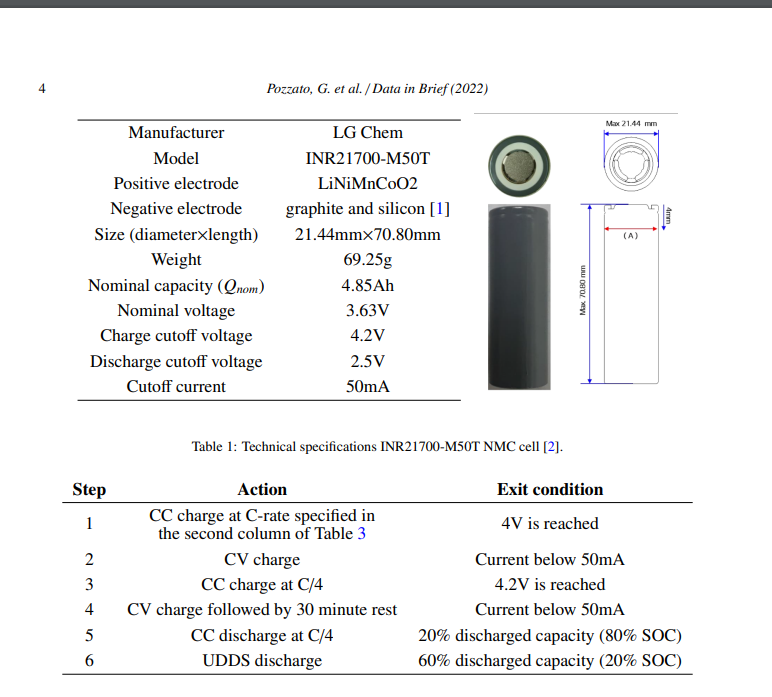

Found 10 main pulse sequences
Pulse start indices: [    0  3962  8028 12094 16160 20226 24292 28358 32424 36490]


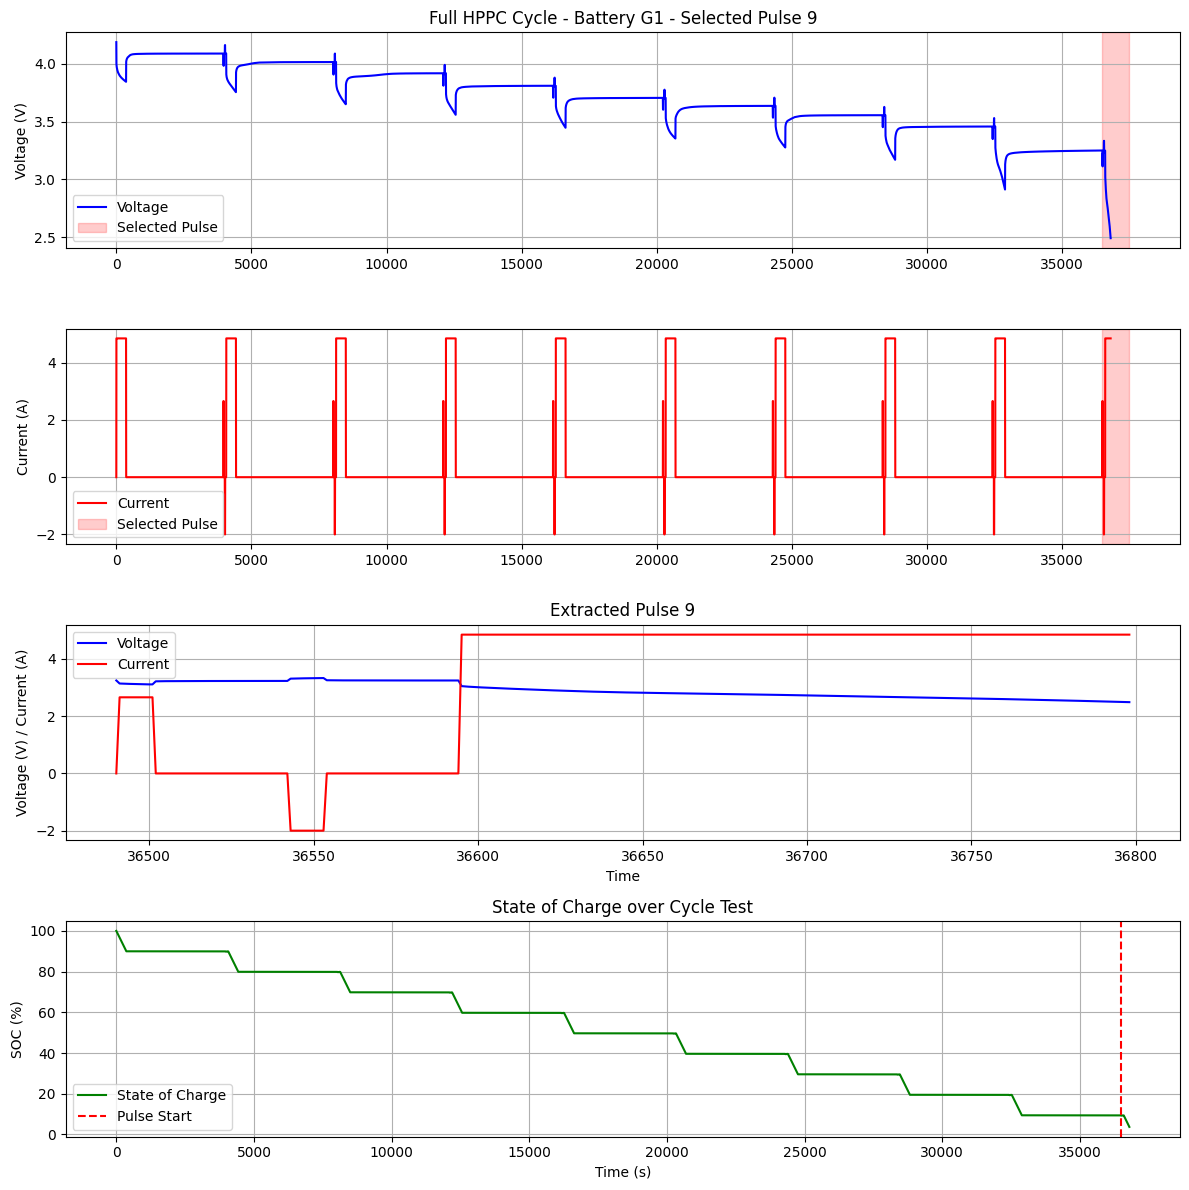


Pulse 9 characteristics:
Start index: 36490
Pulse duration: 309 points
Voltage drop during pulse: 0.842V
Peak current: 4.85A
Inital SoC: 9.413351501932397
Final SoC: 3.704707363080601


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

def extract_pulse(current, voltage, time, start_idx, window_size=1000):
    """
    Extract a pulse sequence from HPPC data.
    
    Args:
        current: Current data array
        voltage: Voltage data array
        time: Time vector
        start_idx: Starting index for the pulse
        window_size: Number of points to extract
    
    Returns:
        Tuple of (time_pulse, current_pulse, voltage_pulse)
    """
    end_idx = min(start_idx + window_size, len(current))
    return (
        time[start_idx:end_idx],
        current[start_idx:end_idx],
        voltage[start_idx:end_idx]
    )

def find_main_pulses(current, min_distance=1000):
    """
    Find main pulse starts while avoiding multiple detections within the same pulse sequence.
    
    Args:
        current: Current data array
        min_distance: Minimum distance between pulses
    
    Returns:
        Array of pulse start indices
    """
    # Find all significant current changes
    current_threshold = 0.1
    all_changes = np.where(np.abs(np.diff(current)) > current_threshold)[0]
    
    # Filter to keep only the start of each main pulse sequence
    main_pulses = []
    last_pulse = -min_distance  # Initialize with negative distance
    
    for idx in all_changes:
        if idx - last_pulse >= min_distance:
            main_pulses.append(idx)
            last_pulse = idx
    return np.array(main_pulses)

# Load and prepare data
mat = sio.loadmat('HPPC_test.mat')
battery_label = 'G1'
cycle_number = 1

# Select data for the specific battery cell
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]

# Extract data for the specific cycle
vcell_cycle = np.array(mat['vcell'][cycle_number][col_index]).flatten()
current_cycle = (np.array(mat['curr'][cycle_number][col_index]).flatten()) * -1

# Remove NaN values
valid_indices = ~np.isnan(vcell_cycle) & ~np.isnan(current_cycle)
vcell_cycle = vcell_cycle[valid_indices]
current_cycle = current_cycle[valid_indices] 
time_vector = np.arange(len(vcell_cycle))

# Find main pulse sequences
pulse_starts = find_main_pulses(current_cycle)

# Parameters you can modify:
pulse_number = 9
window_size = 1000 

# Print available pulses
print(f"Found {len(pulse_starts)} main pulse sequences")
print(f"Pulse start indices: {pulse_starts[:10]}")  

# Extract the selected pulse
selected_start = pulse_starts[pulse_number]
time_pulse, current_pulse, voltage_pulse = extract_pulse(
    current_cycle, vcell_cycle, time_vector, selected_start, window_size
)

# Calculate state of charge (SOC) over the entire cycle using coulomb counting.
# We assume:
#   - A time step (dt) of 1 second (since time_vector is simply an index)
#   - A battery capacity (for example, 4.85 Ah, converted to coulombs: 4.85*3600)
#       note: 4.85 is the lgm50 battery nominal cell capacity.
battery_capacity = 4.85 * 3600  # capacity in coulombs

# Compute the cumulative charge drawn (in coulombs)
""" 
Columbing counting method to calculate soc:
soc(t) = soc(t - 1) + (i(t) / Qn) * delta T

In my code that means:
SOC= 100 − (battery_capacity /cumulative_charge) * 100
"""
# (Note: if current is positive during discharge, SOC will decrease)
cumulative_charge = np.cumsum(current_cycle)  # assuming dt = 1 second

# Calculate SOC: starting at 100%, subtract the fraction of capacity used.
soc = 100 - (cumulative_charge / battery_capacity) * 100

# Extract SOC values for the selected pulse range
soc_pulse = soc[selected_start:selected_start + len(time_pulse)]

# Create figure with 4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))

# Plot full cycle voltage and highlight the selected pulse
ax1.plot(time_vector, vcell_cycle, 'b-', label='Voltage')
ax1.axvspan(selected_start, selected_start + window_size, color='red', alpha=0.2, label='Selected Pulse')
ax1.set_ylabel('Voltage (V)')
ax1.set_title(f'Full HPPC Cycle - Battery {battery_label} - Selected Pulse {pulse_number}')
ax1.grid(True)
ax1.legend()

# Plot full cycle current and highlight the selected pulse
ax2.plot(time_vector, current_cycle, 'r-', label='Current')
ax2.axvspan(selected_start, selected_start + window_size, color='red', alpha=0.2, label='Selected Pulse')
ax2.set_ylabel('Current (A)')
ax2.grid(True)
ax2.legend()

# Plot extracted pulse for both voltage and current
ax3.plot(time_pulse, voltage_pulse, 'b-', label='Voltage')
ax3.plot(time_pulse, current_pulse, 'r-', label='Current')
ax3.set_xlabel('Time')
ax3.set_ylabel('Voltage (V) / Current (A)')
ax3.set_title(f'Extracted Pulse {pulse_number}')
ax3.grid(True)
ax3.legend()

# Plot the State of Charge (SOC) over the full cycle
ax4.plot(time_vector, soc, 'g-', label='State of Charge')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('SOC (%)')
ax4.set_title('State of Charge over Cycle Test')
# Mark the start of the selected pulse on the SOC curve
ax4.axvline(x=selected_start, color='red', linestyle='--', label='Pulse Start')
ax4.grid(True)
ax4.legend()

plt.tight_layout()
plt.show()

# Print pulse characteristics
print(f"\nPulse {pulse_number} characteristics:")
print(f"Start index: {selected_start}")
print(f"Pulse duration: {len(time_pulse)} points")
print(f"Voltage drop during pulse: {voltage_pulse.max() - voltage_pulse.min():.3f}V")
print(f"Peak current: {np.abs(current_pulse).max():.2f}A")
print(f"Inital SoC: {soc_pulse[0]}")
print(f"Final SoC: {soc_pulse[-1]}")

In [22]:
import os

# Create DataFrame for the LUT
lut = pd.DataFrame({
    'Time': time_pulse,
    'Voltage': voltage_pulse,
    'Current': current_pulse,
    'SoC': soc_pulse
})

print(lut.head())

output_folder = f"hppc_lut/{battery_label}"
output_file = os.path.join(output_folder, f"battery_{battery_label}_cycle_{cycle_number+1}_pulse_{pulse_number}_lut.csv")
os.makedirs(output_folder, exist_ok=True)
lut.to_csv(output_file, index=False)

    Time   Voltage   Current       SoC
0  36490  3.249613 -0.000000  9.413352
1  36491  3.142440  2.660254  9.398115
2  36492  3.137277  2.660286  9.382879
3  36493  3.133064  2.660228  9.367643
4  36494  3.129460  2.660283  9.352406


Found 10 main pulse sequences
Pulse start indices: [    0  3962  8028 12094 16160 20226 24292 28358 32424 36490]


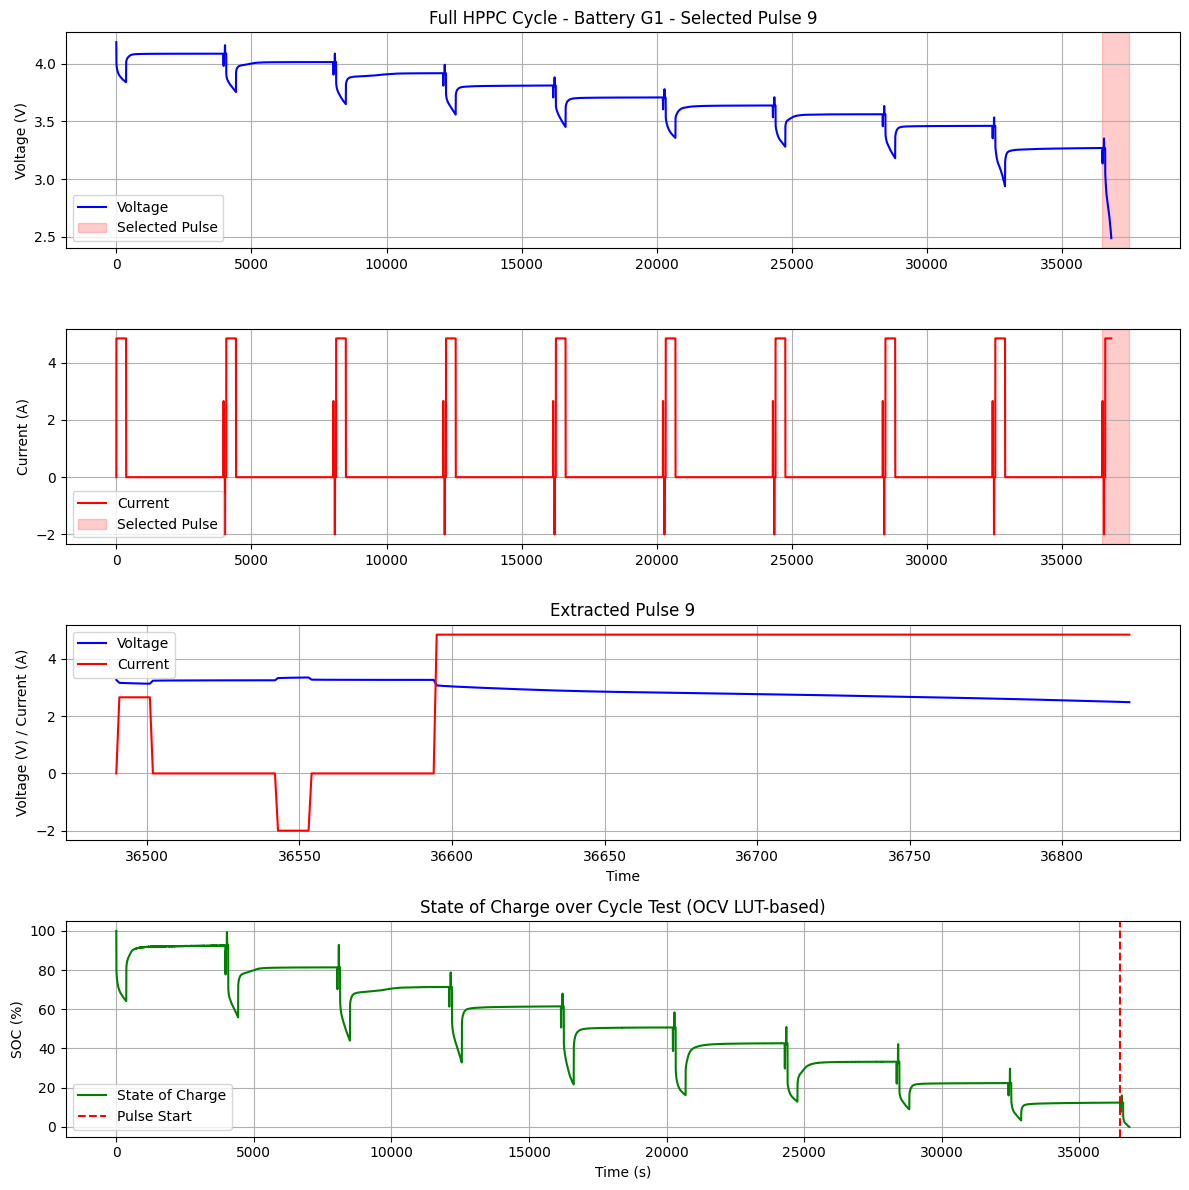


Pulse 9 characteristics:
Start index: 36490
Pulse duration: 333 points
Voltage drop during pulse: 0.863V
Peak current: 4.85A
Initial SoC (from OCV): 12.40%
Final SoC (from OCV): 0.00%


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

# Load OCV-to-SOC LUT
ocv_lut_file = "parameterization/data/G1_ocv.csv"
ocv_lut = pd.read_csv(ocv_lut_file)

# Ensure LUT is sorted by OCV for correct interpolation
ocv_lut = ocv_lut.sort_values(by="OCV")

# Extract SOC and OCV values
soc_values = ocv_lut["SOC"].values
ocv_values = ocv_lut["OCV"].values

# Function to estimate SOC using OCV
def estimate_soc_from_ocv(voltage):
    return np.interp(voltage, ocv_values, soc_values)

# Load and prepare HPPC test data
mat = sio.loadmat('HPPC_test.mat')
battery_label = 'G1'
cycle_number = 0

# Select data for the specific battery cell
col_index = np.where([label[0] == battery_label for label in mat['col_cell_label'][0]])[0][0]

# Extract voltage and current for the cycle
vcell_cycle = np.array(mat['vcell'][cycle_number][col_index]).flatten()
current_cycle = (np.array(mat['curr'][cycle_number][col_index]).flatten()) * -1  # Ensure discharge is positive

# Remove NaN values
valid_indices = ~np.isnan(vcell_cycle) & ~np.isnan(current_cycle)
vcell_cycle = vcell_cycle[valid_indices]
current_cycle = current_cycle[valid_indices]
time_vector = np.arange(len(vcell_cycle))

# Estimate SOC from voltage using OCV LUT
soc_cycle = estimate_soc_from_ocv(vcell_cycle)

# Function to extract pulse data
def extract_pulse(current, voltage, soc, time, start_idx, window_size=1000):
    end_idx = min(start_idx + window_size, len(current))
    return (
        time[start_idx:end_idx],
        current[start_idx:end_idx],
        voltage[start_idx:end_idx],
        soc[start_idx:end_idx]
    )

# Function to find main pulse starts
def find_main_pulses(current, min_distance=1000):
    current_threshold = 0.1  # Detect significant changes in current
    all_changes = np.where(np.abs(np.diff(current)) > current_threshold)[0]

    main_pulses = []
    last_pulse = -min_distance  # Initialize with negative distance

    for idx in all_changes:
        if idx - last_pulse >= min_distance:
            main_pulses.append(idx)
            last_pulse = idx
    return np.array(main_pulses)

# Find main pulse sequences
pulse_starts = find_main_pulses(current_cycle)

# Parameters
pulse_number = 9
window_size = 1000

# Print available pulses
print(f"Found {len(pulse_starts)} main pulse sequences")
print(f"Pulse start indices: {pulse_starts[:10]}")  

# Extract selected pulse
selected_start = pulse_starts[pulse_number]
time_pulse, current_pulse, voltage_pulse, soc_pulse = extract_pulse(
    current_cycle, vcell_cycle, soc_cycle, time_vector, selected_start, window_size
)

# Create figure with 4 subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))

# Plot full cycle voltage with selected pulse highlighted
ax1.plot(time_vector, vcell_cycle, 'b-', label='Voltage')
ax1.axvspan(selected_start, selected_start + window_size, color='red', alpha=0.2, label='Selected Pulse')
ax1.set_ylabel('Voltage (V)')
ax1.set_title(f'Full HPPC Cycle - Battery {battery_label} - Selected Pulse {pulse_number}')
ax1.grid(True)
ax1.legend()

# Plot full cycle current with selected pulse highlighted
ax2.plot(time_vector, current_cycle, 'r-', label='Current')
ax2.axvspan(selected_start, selected_start + window_size, color='red', alpha=0.2, label='Selected Pulse')
ax2.set_ylabel('Current (A)')
ax2.grid(True)
ax2.legend()

# Plot extracted pulse for voltage and current
ax3.plot(time_pulse, voltage_pulse, 'b-', label='Voltage')
ax3.plot(time_pulse, current_pulse, 'r-', label='Current')
ax3.set_xlabel('Time')
ax3.set_ylabel('Voltage (V) / Current (A)')
ax3.set_title(f'Extracted Pulse {pulse_number}')
ax3.grid(True)
ax3.legend()

# Plot SOC over the full cycle (using OCV LUT)
ax4.plot(time_vector, soc_cycle, 'g-', label='State of Charge')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('SOC (%)')
ax4.set_title('State of Charge over Cycle Test (OCV LUT-based)')
ax4.axvline(x=selected_start, color='red', linestyle='--', label='Pulse Start')
ax4.grid(True)
ax4.legend()

plt.tight_layout()
plt.show()

# Print pulse characteristics
print(f"\nPulse {pulse_number} characteristics:")
print(f"Start index: {selected_start}")
print(f"Pulse duration: {len(time_pulse)} points")
print(f"Voltage drop during pulse: {voltage_pulse.max() - voltage_pulse.min():.3f}V")
print(f"Peak current: {np.abs(current_pulse).max():.2f}A")
print(f"Initial SoC (from OCV): {soc_pulse[0]:.2f}%")
print(f"Final SoC (from OCV): {soc_pulse[-1]:.2f}%")


In [ ]:
import os

# Create DataFrame for the LUT
lut = pd.DataFrame({
    'Time': time_pulse,
    'Voltage': voltage_pulse,
    'Current': current_pulse,
    'SoC': soc_pulse
})

print(lut.head())

output_folder = f"hppc_lut/{battery_label}"
output_file = os.path.join(output_folder, f"battery_{battery_label}_cycle_{cycle_number+1}_pulse_{pulse_number}_lut.csv")
os.makedirs(output_folder, exist_ok=True)
lut.to_csv(output_file, index=False)

In [32]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt

# Load your data (you've already done this part)
path = os.getcwd()
ocv_data = pybamm.parameters.process_1D_data("parameterization\\data\\G1_ocv.csv", path=path)
r0_data = pybamm.parameters.process_2D_data_csv("parameterization\\data\\r0.csv", path=path)
r1_data = pybamm.parameters.process_2D_data_csv("parameterization\\data\\r1.csv", path=path)
c1_data = pybamm.parameters.process_2D_data_csv("parameterization\\data\\c1.csv", path=path)

# Interpolation functions (adjusted to handle additional arguments)
def ocv(sto):
    name, (x, y) = ocv_data
    return pybamm.Interpolant(x, y, sto, name)

def r0(current, soc, *args):
    name, (x, y) = r0_data
    return pybamm.Interpolant(x, y, [current, soc], name)

def r1(current, soc, *args):
    name, (x, y) = r1_data
    return pybamm.Interpolant(x, y, [current, soc], name)

def c1(current, soc, *args):
    name, (x, y) = c1_data
    return pybamm.Interpolant(x, y, [current, soc], name)

# Parameter values function (you've already started this)
def get_parameter_values():
    # Your parameter values as defined
    cell_capacity = 100
    
    values = {
        "chemistry": "ecm",
        "Initial SoC": 0.5,
        "Initial temperature [K]": 25 + 273.15,
        "Cell capacity [A.h]": cell_capacity,
        "Nominal cell capacity [A.h]": cell_capacity,
        "Ambient temperature [K]": 25 + 273.15,
        "Current function [A]": 100,
        "Upper voltage cut-off [V]": 4.2,
        "Lower voltage cut-off [V]": 2.5,
        "Cell thermal mass [J/K]": 1000,
        "Cell-jig heat transfer coefficient [W/K]": 10,
        "Jig thermal mass [J/K]": 500,
        "Jig-air heat transfer coefficient [W/K]": 10,
        "Open-circuit voltage [V]": ocv,
        "R0 [Ohm]": r0,
        "Element-1 initial overpotential [V]": 0,
        "R1 [Ohm]": r1,
        "C1 [F]": c1,
        "RCR lookup limit [A]": 340,
        "Entropic change [V/K]": 0,  
        # Additional parameters for SplitOCVR model
        "Negative electrode capacity [A.h]": cell_capacity,
        "Positive electrode capacity [A.h]": cell_capacity,
        "Negative electrode initial stoichiometry": 0.5,
        "Positive electrode initial stoichiometry": 0.5,
        "Negative electrode OCP [V]": ocv,
        "Positive electrode OCP [V]": ocv,
        "Ohmic resistance [Ohm]": r0(100, 0.5),  # Example value
    }
    
    return values

model = pybamm.lithium_ion.SplitOCVR()
# model = pybamm.equivalent_circuit.Thevenin(options={"number of rc elements":1})
parameter_values = pybamm.ParameterValues(values=get_parameter_values())

t_eval = np.linspace(0, 3600, 100)
solver = pybamm.CasadiSolver(mode="safe", atol=1e-6, rtol=1e-3)

sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve(t_eval=t_eval)
sim.plot()

SolverError: Events ['Minimum voltage [V]'] are non-positive at initial conditions

In [ ]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt

# Load your data (you've already done this part)
path = os.getcwd()
ocv_data = pybamm.parameters.process_1D_data("parameterization\\data\\G1_ocv.csv", path=path)
r0_data = pybamm.parameters.process_2D_data_csv("parameterization\\data\\r0.csv", path=path)
r1_data = pybamm.parameters.process_2D_data_csv("parameterization\\data\\r1.csv", path=path)
c1_data = pybamm.parameters.process_2D_data_csv("parameterization\\data\\c1.csv", path=path)

# Interpolation functions (adjusted to handle additional arguments)
def ocv(sto):
    name, (x, y) = ocv_data
    return pybamm.Interpolant(x, y, sto, name)

def r0(current, soc, *args):
    name, (x, y) = r0_data
    return pybamm.Interpolant(x, y, [current, soc], name)

def r1(current, soc, *args):
    name, (x, y) = r1_data
    return pybamm.Interpolant(x, y, [current, soc], name)

def c1(current, soc, *args):
    name, (x, y) = c1_data
    return pybamm.Interpolant(x, y, [current, soc], name)

# Parameter values function (you've already started this)
def get_parameter_values():
    # Your parameter values as defined
    cell_capacity = 100
    
    # Calculate initial voltage based on initial SoC
    initial_soc = 0.5  # Initial state of charge
    initial_voltage = ocv(initial_soc)  # Calculate initial voltage using OCV function
    
    # Ensure initial voltage is within the cut-off limits
    lower_voltage_cutoff = 3.2
    upper_voltage_cutoff = 4.2
    if initial_voltage < lower_voltage_cutoff or initial_voltage > upper_voltage_cutoff:
        raise ValueError(
            f"Initial voltage ({initial_voltage:.2f} V) is outside the allowed range "
            f"({lower_voltage_cutoff} V to {upper_voltage_cutoff} V). "
            "Adjust the initial SoC or voltage cut-offs."
        )
    
    values = {
        "chemistry": "ecm",
        "Initial SoC": initial_soc,
        "Initial temperature [K]": 25 + 273.15,
        "Cell capacity [A.h]": cell_capacity,
        "Nominal cell capacity [A.h]": cell_capacity,
        "Ambient temperature [K]": 25 + 273.15,
        "Current function [A]": 100,
        "Upper voltage cut-off [V]": upper_voltage_cutoff,
        "Lower voltage cut-off [V]": lower_voltage_cutoff,
        "Cell thermal mass [J/K]": 1000,
        "Cell-jig heat transfer coefficient [W/K]": 10,
        "Jig thermal mass [J/K]": 500,
        "Jig-air heat transfer coefficient [W/K]": 10,
        "Open-circuit voltage [V]": ocv,
        "R0 [Ohm]": r0,
        "Element-1 initial overpotential [V]": 0,
        "R1 [Ohm]": r1,
        "C1 [F]": c1,
        "RCR lookup limit [A]": 340,
        "Entropic change [V/K]": 0,  
        # Additional parameters for SplitOCVR model
        "Negative electrode capacity [A.h]": cell_capacity,
        "Positive electrode capacity [A.h]": cell_capacity,
        "Negative electrode initial stoichiometry": initial_soc,
        "Positive electrode initial stoichiometry": initial_soc,
        "Negative electrode OCP [V]": ocv,
        "Positive electrode OCP [V]": ocv,
        "Ohmic resistance [Ohm]": r0(100, initial_soc),  # Example value
    }
    
    return values

# Define the SplitOCVR model
model = pybamm.lithium_ion.SplitOCVR()
parameter_values = pybamm.ParameterValues(values=get_parameter_values())

# Time evaluation
t_eval = np.linspace(0, 3600, 100)

# Solver settings
solver = pybamm.CasadiSolver(mode="safe", atol=1e-6, rtol=1e-3)

# Simulation
sim = pybamm.Simulation(model, parameter_values=parameter_values, solver=solver)
sim.solve(t_eval=t_eval)

# Plot results
sim.plot()